In [101]:
import pandas as pd

### Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

оценка 2 и ниже — низкий рейтинг;
оценка 4 и ниже — средний рейтинг;
оценка 4.5 и 5 — высокий рейтинг.

In [102]:
m_df = pd.read_csv('ml-latest-small/movies.csv')
m_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [103]:
r_df = pd.read_csv('ml-latest-small/ratings.csv')
r_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [104]:
merged = pd.merge(r_df,m_df, on='movieId', how='outer')
merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1.0,31,2.5,1.260759e+09,Dangerous Minds (1995),Drama
1,7.0,31,3.0,8.518688e+08,Dangerous Minds (1995),Drama
2,31.0,31,4.0,1.273542e+09,Dangerous Minds (1995),Drama
3,32.0,31,4.0,8.348284e+08,Dangerous Minds (1995),Drama
4,36.0,31,3.0,8.470572e+08,Dangerous Minds (1995),Drama


In [105]:
def rate(df):
    if df <= 2:
        return 'low'
    elif 2 < df <= 4:
        return 'middle'
    elif 4.5 <= df <= 5:
        return 'high'
    elif pd.isnull(df):
        return 'unrated' # лучше заполнить цифрами, или None оставить?

In [106]:
pd.set_option('display.max_rows', 100)

In [107]:
merged['class'] = merged['rating'].apply(rate)
merged.head(100)

,userId,movieId,rating,timestamp,title,genres,class
0,1.0,31,2.5,1.260759e+09,Dangerous Minds (1995),Drama,middle
1,7.0,31,3.0,8.518688e+08,Dangerous Minds (1995),Drama,middle
2,31.0,31,4.0,1.273542e+09,Dangerous Minds (1995),Drama,middle
3,32.0,31,4.0,8.348284e+08,Dangerous Minds (1995),Drama,middle
4,36.0,31,3.0,8.470572e+08,Dangerous Minds (1995),Drama,middle
5,39.0,31,3.0,8.325252e+08,Dangerous Minds (1995),Drama,middle
6,73.0,31,3.5,1.255592e+09,Dangerous Minds (1995),Drama,middle
7,88.0,31,3.0,1.239756e+09,Dangerous Minds (1995),Drama,middle
8,96.0,31,2.5,1.223256e+09,Dangerous Minds (1995),Drama,middle
9,110.0,31,4.0,8.401007e+08,Dangerous Minds (1995),Drama,middle


In [108]:
merged[['rating','class']].value_counts().reset_index().sort_values('rating', ascending=True)

,rating,class,count
9,0.5,low,1101
7,1.0,low,3326
8,1.5,low,1687
5,2.0,low,7271
6,2.5,middle,4449
1,3.0,middle,20064
3,3.5,middle,10538
0,4.0,middle,28750
4,4.5,high,7723
2,5.0,high,15095


### Задаеие 2
Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

In [109]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [110]:
rqs_df = pd.read_csv('ml-latest-small/keywords.csv')

In [111]:
def g_data(rqst):
    region = []
    for word in rqst.lower().split(' '):
        for reg,cities in geo_data.items():
            if word in cities:
                region.append(reg)
            
    return ','.join(set(region)) if len(region) >= 1 else 'undefined'

In [112]:
rqs_df['region'] = rqs_df['keyword'].apply(g_data)

In [113]:
pd.set_option('display.max_rows',1000)

In [114]:
rqs_df['region'].value_counts()

region
undefined             99406
Центр                   382
Северо-Запад            146
Дальний Восток           64
Центр,Северо-Запад        2
Name: count, dtype: int64

### Задача №3
Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

In [115]:
merged.title.value_counts()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
                                            ... 
Light Years (Gandahar) (1988)                  1
Medium Cool (1969)                             1
Slam (1998)                                    1
Dark Blue World (Tmavomodrý svet) (2001)       1
Women of '69, Unboxed                          1
Name: count, Length: 9123, dtype: int64

вроде такая регулярка оставляет только те фильмы у которых вообще нет года выпуска

def find_year(strng):
    from re import search
    yr = search(r'\((\d{4}.?\w*)\)',strng)
    return yr.group(1) if yr else '1900'

merged['year'] = merged['title'].apply(find_year)

In [116]:
year = [str(year) for year in range(1950,2011)]

In [117]:
def production_year(title):
    answer = False
    for yr in year:
        if yr in title:
            answer = yr
    return answer if answer else '1900'

In [118]:
merged['year'] = merged['title'].apply(production_year)

In [119]:
stats = merged.groupby('year').agg({'rating':'mean'}).sort_values('year',ascending=True).reset_index()

In [120]:
stats.head()

,year,rating
0,1900,3.602960
1,1950,3.915254
2,1951,3.983539
3,1952,4.000000
4,1953,3.754587


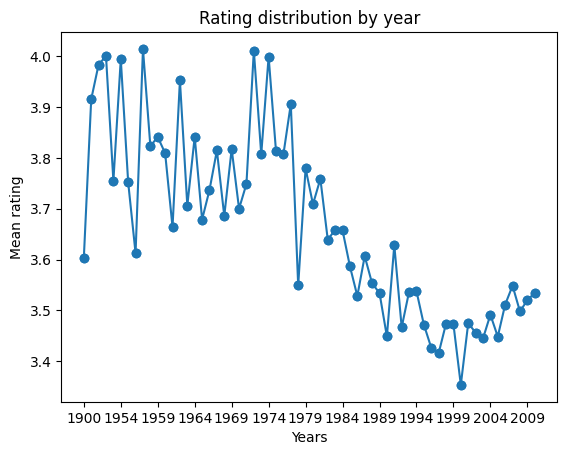

In [121]:
import matplotlib.pyplot as plt
x = stats.year
y = stats.rating

plt.scatter(x,y)
plt.plot(x,y, linestyle='-', marker='o')
plt.xlabel('Years')
plt.ylabel('Mean rating')
plt.title('Rating distribution by year')
plt.xticks(ticks=range(0,len(x),5))
plt.show()